In [1]:
using BenchmarkTools
using DataFrames
using DelimitedFiles
using CSV
using Plots
using GLM

In [2]:
df = CSV.read("Data/Hitters.csv", DataFrame)
typeof(df)

DataFrame

In [3]:
size(df)

(322, 21)

In [4]:

first(df,5)

,Column1,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits
,String31,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,-Andy Allanson,293,66,1,30,29,14,1,293,66
2,-Alan Ashby,315,81,7,24,38,39,14,3449,835
3,-Alvin Davis,479,130,18,66,72,76,3,1624,457
4,-Andre Dawson,496,141,20,65,78,37,11,5628,1575
5,-Andres Galarraga,321,87,10,39,42,30,2,396,101


In [5]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Column1,,-Al Newman,,-Willie Wilson,0,String31
2,AtBat,380.929,16,379.5,687,0,Int64
3,Hits,101.025,1,96.0,238,0,Int64
4,HmRun,10.7702,0,8.0,40,0,Int64
5,Runs,50.9099,0,48.0,130,0,Int64
6,RBI,48.028,0,44.0,121,0,Int64
7,Walks,38.7422,0,35.0,105,0,Int64
8,Years,7.4441,1,6.0,24,0,Int64
9,CAtBat,2648.68,19,1928.0,14053,0,Int64


In [6]:
y=df.Salary

322-element Vector{String15}:
 "NA"
 "475"
 "480"
 "500"
 "91.5"
 "750"
 "70"
 "100"
 "75"
 "1100"
 "517.143"
 "512.5"
 "550"
 ⋮
 "1300"
 "525"
 "550"
 "1600"
 "120"
 "165"
 "NA"
 "700"
 "875"
 "385"
 "960"
 "1000"

In [7]:
count(ismissing, df.Salary)

0

In [22]:
for y in df.Salary
     if y=="NA"
      println(y)
    end
end

NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA


In [8]:
describe(df, :nmissing)

,variable,nmissing
,Symbol,Int64
1,Column1,0
2,AtBat,0
3,Hits,0
4,HmRun,0
5,Runs,0
6,RBI,0
7,Walks,0
8,Years,0
9,CAtBat,0


In [9]:
df.Salary = log.(df.Salary)

LoadError: MethodError: no method matching log(::String15)
[0mClosest candidates are:
[0m  log([91m::StridedMatrix{T} where T[39m) at C:\Users\Heril\AppData\Local\Programs\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\dense.jl:757
[0m  log([91m::LinearAlgebra.UnitUpperTriangular{T, S} where S<:AbstractMatrix{T}[39m) where T<:Union{Float32, Float64, ComplexF32, ComplexF64} at C:\Users\Heril\AppData\Local\Programs\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\triangular.jl:1783
[0m  log([91m::LinearAlgebra.UpperTriangular{T, S} where S<:AbstractMatrix{T}[39m) where T<:Union{Float32, Float64, ComplexF32, ComplexF64} at C:\Users\Heril\AppData\Local\Programs\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\triangular.jl:1782
[0m  ...

In [10]:
map( x -> x <= 0 ? 0.0 : log(x), df.Salary)

LoadError: MethodError: no method matching isless(::String15, ::Int64)
[0mClosest candidates are:
[0m  isless([91m::Union{StatsBase.PValue, StatsBase.TestStat}[39m, ::Real) at C:\Users\Heril\.julia\packages\StatsBase\pJqvO\src\statmodels.jl:90
[0m  isless(::AbstractString, [91m::AbstractString[39m) at C:\Users\Heril\AppData\Local\Programs\Julia-1.7.2\share\julia\base\strings\basic.jl:344
[0m  isless([91m::AbstractFloat[39m, ::Real) at C:\Users\Heril\AppData\Local\Programs\Julia-1.7.2\share\julia\base\operators.jl:186
[0m  ...

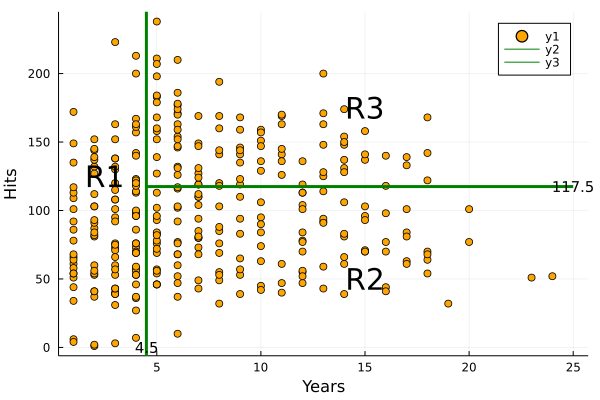

In [11]:
scatter(df.Years, df.Hits, xlabel="Years", ylabel="Hits",color = :orange)
vline!([4.5], lw=3,color = :green)
plot!([4.5, 25], [117.5, 117.5], lw=3,color = :green)
annotate!(2.5,125, Plots.text("R1", 20, :dark))
annotate!(15,50, Plots.text("R2", 20, :dark))
annotate!(15,175, Plots.text("R3", 20, :dark))
annotate!(25,117.5, Plots.text("117.5", 10, :dark))
annotate!(4.5,0, Plots.text("4.5", 10, :dark))

In [12]:
using MLUtils

In [13]:
Xs, Ys = shuffleobs((X, Y))

LoadError: UndefVarError: X not defined